# Hypothesis Testing and Evaluation

## EXERCISE 1: Comparing layouts

### Experimental setup

*Problem*: Find out which version of a display is better.

*Question*: Do users prefer Grid view?

*Null hypothesis*: Users do not prefer Grid view.

### Create ratings data

We assume different subject groups for each conditions. Each subject sees one of the layouts and is asked to rate on a 5-point Likert scale how strongly the agree or disagree with the statement:

> Page gives a good overview.
> 
> 1=strongly agree; 2=agree; 3=neutral; 4=disagree; 5=strongly disagree

G_data corresponds to ratings from users that see the grid view. L_data corresponds to ratings from users that see the list view.

In [4]:
from scipy import stats
import numpy as np
G_data = [1, 3, 3, 2, 4, 2, 3, 3, 1, 5, 2, 3, 4, 2, 1, 3, 2, 2, 1, 3,
          2, 3, 4, 2, 1, 3, 2, 2, 1, 3, 1, 3, 3, 2, 4, 2, 3, 3, 1, 5]
L_data = [4, 5, 2, 4, 4, 3, 5, 4, 3, 5, 1, 4, 5, 3, 4, 4, 2, 3, 4, 5,
          1, 4, 5, 3, 4, 4, 2, 3, 4, 5, 4, 5, 2, 4, 4, 3, 5, 4, 3, 5]
print('Grid median:', np.median(G_data))
print('List median:', np.median(L_data))

Grid median: 2.5
List median: 4.0


### Visualise ratings data

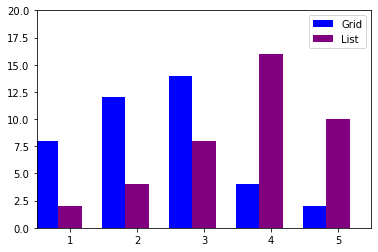

In [24]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt

def count(data):
    c = Counter(data)
    return list(c.keys()), list(c.values())

G_bins, G_freqs = count(G_data)
L_bins, L_freqs = count(L_data)
bar_width = 0.35

plt.bar([b-bar_width for b in G_bins], G_freqs, bar_width, color='blue', label='Grid')
plt.bar(L_bins, L_freqs, bar_width, color='purple', label='List')

plt.xlim(0.5, 5.5)
plt.ylim(0,20)
plt.legend()
plt.show()

### TODO Test whether List view is preferred

- Can we reject the null hypothesis at p<0.01 using the Mann-Whitney U test?
- Do users prefer List view?

In [6]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

### TODO p-hacking example

Imagine we instead measured average monthly spend. Let's assume a sample of 1000 grid users spend \$155 on average with standard deviation 40, and a sample of 1000 list users spend \$150 on average with standard deviation 40.

In [7]:

N = 1000
G_mu, G_sigma = 155, 40
L_mu, L_sigma = 150, 40

def run_experiment():
    G_spend = np.random.normal(G_mu, G_sigma, N)
    L_spend = np.random.normal(L_mu, L_sigma, N)
    return stats.ttest_ind(G_spend, L_spend).pvalue*0.5 # one-tailed for testing G_mu > L_mu

- Run 1000 experiments
- For what percentage of experiments do we fail to reject the null hypothesis at 0.05?
- Do your neighbours get the same percentage?
- How can we avoid false rejections?

In [8]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 2: Comparing mobile behaviour

### Experimental setup

Adapted from http://www.beefissuesquarterly.com/beefissuesquarterly.aspx?id=4078.

*Problem*: Find out whether there is a difference in mobile behaviour between generations.

*Question*: Is there any difference between groups?

*Null hypothesis*: Group means are the same.

### Generate generation data

Imagine we conducted a survey of 200 baby boomers (born 1945-1960), 200 generation xers (born 1961-1980) and 200 millennials (born 1981-1995).

For the purposes of this exercise, let's generate some simulated samples. We assume:
- Boomers send 5 texts per day on average with standard deviation 2;
- GenXers send 12 texts per day on average with standard deviation 3;
- Millennials send 20 texts per day on average with standard deviation 5.

We use `numpy.random.normal` to generate random values from a normal distribution with these parameters

In [9]:
import numpy as np
N = 200
B_mu, B_sigma = 5, 2
X_mu, X_sigma = 12, 3
M_mu, M_sigma = 20, 5
B_data = [int(round(n)) for n in np.random.normal(B_mu, B_sigma, N)]
X_data = [int(round(n)) for n in np.random.normal(X_mu, X_sigma, N)]
M_data = [int(round(n)) for n in np.random.normal(M_mu, M_sigma, N)]

### Visualise generation data

Let's use the `matplotlib.pyplot.hist` function to plot our visualise our three distributions.

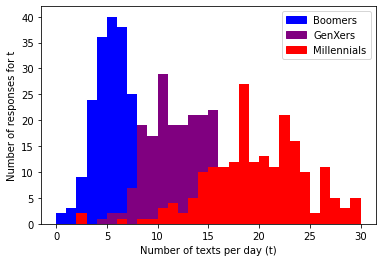

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
start,end,n_bins = 0,30,30
_,_,_ = plt.hist(B_data, bins=n_bins, range=(start,end), color='blue')
_,_,_ = plt.hist(X_data, bins=n_bins, range=(start,end), color='purple')
_,_,_ = plt.hist(M_data, bins=n_bins, range=(start,end), color='red')
_ = plt.legend(handles=[mpatches.Patch(color='blue', label='Boomers'),
                    mpatches.Patch(color='purple', label='GenXers'),
                    mpatches.Patch(color='red', label='Millennials')])
_ = plt.xlabel('Number of texts per day (t)')
_ = plt.ylabel('Number of responses for t')

### TODO Test for differences

- Use one-way analysis of variance (ANOVA) to test whether the sample means are the same.
- Can we reject the null hypothesis at p<0.01?
- Is there a reliable difference in texting behaviour between generations?

In [11]:
from scipy import stats
anova_result = stats.f_oneway(B_data, X_data, M_data)
print(bool(anova_result.pvalue < 0.01))

True


### TODO Check ANOVA assumptions

- Does our data meet the assumptions for a one-way ANOVA?
- Can we reject the null hypothesis using the Kruskall-Wallis H-test?
- Is there a reliable difference in texting behaviour between generations?

In [12]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError


### TODO Further generation exercises

Imagine we wanted to compare millennials to generation z (born since 1996). Let's assume this population sends 21 texts per day on average with standard deviation 5.

- Generate a simulated sample Z_data.
- What test should we use?
- Is there a reliable difference in texting behaviour between millennials and generation Z?

In [13]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 3: Comparing classifiers

### Experimental setup

*Problem*: Determine which classifer is better.

*Question*: Is my shiny, new model better?

*Null hypothesis*: The new model is not better.

### Generate gold and classifier labellings

We generate 10,000 gold labels, marking a approximately 20% as spam (1) based on a random number generator and the rest as ham (0).

In [14]:
import random
random.random()
N = 10000
GOLD_PCT_SPAM = 0.2
Y_gold = [int(random.random()<GOLD_PCT_SPAM) for _ in range(N)]

freq = Counter(Y_gold)
print (freq)

Counter({0: 7983, 1: 2017})


We generate two system labellings by ranodomly flipping gold labels assuming:
- System 1 incorrectly marks 5% of ham as spam and fails to detect 20% of actual spam,
- System 2 incorrectly marks 10% of ham as spam and fails to detect 10% of actual spam.

In [15]:
import pandas as pd

SYS1_ERROR_RATES = {
    0: 0.05,  # spurious: sys1 incorrectly marks 5% of ham as spam
    1: 0.2,   # misses: sys1 fails to detect 20% of spam
}
SYS2_ERROR_RATES = {
    0: 0.1,  # spurious: sys2 incorrectly marks 10% of ham as spam
    1: 0.1   # misses: sys2 fails to detect 10% of spam
}

def simulate_predictions(Yg, error_rates):
    for y in Yg:
        if random.random()<error_rates[y]:
            yield 1-y
        else:
            yield y

Y_sys1 = list(simulate_predictions(Y_gold, SYS1_ERROR_RATES))
Y_sys2 = list(simulate_predictions(Y_gold, SYS2_ERROR_RATES))

y_actu = pd.Series(Y_gold, name='Actual')
y_pred_s1 = pd.Series(Y_sys1, name='Predicted')
y_pred_s2 = pd.Series(Y_sys2, name='Predicted')

confusion_s1 = pd.crosstab(y_actu,y_pred_s1)
print(confusion_s1)
print()
confusion_s2 = pd.crosstab(y_actu, y_pred_s2)
print(confusion_s2)

Predicted     0     1
Actual               
0          7597   386
1           387  1630

Predicted     0     1
Actual               
0          7205   778
1           199  1818


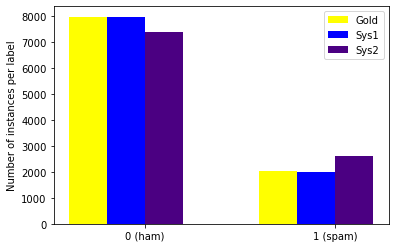

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

def class_distr(Y):
    return zip(*sorted(Counter(Y).items()))

gold_classes, gold_freqs = class_distr(Y_gold)
sys1_classes, sys1_freqs = class_distr(Y_sys1)
sys2_classes, sys2_freqs = class_distr(Y_sys2)

bar_width = 0.2

_ = plt.bar([b-(1.5*bar_width) for b in gold_classes], gold_freqs, bar_width, color='yellow', label='Gold')
_ = plt.bar([b-(0.5*bar_width) for b in sys1_classes], sys1_freqs, bar_width, color='blue', label='Sys1')
_ = plt.bar([b+(0.5*bar_width) for b in sys2_classes], sys2_freqs, bar_width, color='indigo', label='Sys2')

plt.xticks([0,1], ['0 (ham)', '1 (spam)'])
plt.ylabel('Number of instances per label')

_ = plt.legend()

### Split data into folds

In [17]:
import numpy as np
NUM_FOLDS = 10
Y_gold_folds = np.array_split(Y_gold, NUM_FOLDS)
Y_sys1_folds = np.array_split(Y_sys1, NUM_FOLDS)
Y_sys2_folds = np.array_split(Y_sys2, NUM_FOLDS)

freq = Counter(Y_gold_folds[0])
print (freq)

Counter({0: 815, 1: 185})


### TODO Calculating classifier accuracy

- Calculate accuracy and f1 scores on first fold.
- Which system has higher accuracy?
- Which system has higher f1 score?
- Which measure has better sensitivity for comparisons?
- Which measure would you rather report?

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

PRF_KWARGS = {
    'pos_label': 1,     # 1 is the positive spam label
    'average': 'binary' # evaluate p/r/f of the positive label
}

Yg0 = Y_gold_folds[0]
Y10 = Y_sys1_folds[0] 
Y20 = Y_sys2_folds[0]

y_actu = pd.Series(Yg0, name='Actual')
y_pred_s1 = pd.Series(Y10, name='Predicted')
y_pred_s2 = pd.Series(Y20, name='Predicted')
confusion_s1 = pd.crosstab(y_actu ,y_pred_s1 )
print(confusion_s1)
print()
confusion_s2 = pd.crosstab(y_actu, y_pred_s2 )
print(confusion_s2)


print("System 1 accuracy:", accuracy_score(Yg0, Y10))
print("System 2 accuracy:", accuracy_score(Yg0, Y20))
print("System 1 f1 score:", f1_score(Yg0, Y10, **PRF_KWARGS))
print("System 2 f1 score:", f1_score(Yg0, Y20, **PRF_KWARGS))

Predicted    0    1
Actual             
0          778   37
1           33  152

Predicted    0    1
Actual             
0          754   61
1           21  164
System 1 accuracy: 0.93
System 2 accuracy: 0.918
System 1 f1 score: 0.8128342245989305
System 2 f1 score: 0.8


- Calculate precision and recall scores on first fold.
- Which system has higher precision?
- Which system has higher recall?
- Formulate precision and recall in terms GOLD_PCT_SPAM, SPURIOUS_ERROR_RATE and MISSED_ERROR_RATE
- Are precision and recall values as expected?

In [19]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

### TODO Calculate accuracy score across folds

- Calculate accuracy across folds
- Compare mean and standard deviation

In [20]:
def score_folds(Ygf, Ysf, scorer, **kwargs):
    for Yg, Ys in zip(Ygf, Ysf):
        yield scorer(Yg, Ys, **kwargs)
        
Y_sys1_accuracy = list(score_folds(Y_gold_folds, Y_sys1_folds, accuracy_score))
Y_sys2_accuracy = list(score_folds(Y_gold_folds, Y_sys2_folds, accuracy_score))

print("System 1 mu, sigma:", np.mean(Y_sys1_accuracy), np.std(Y_sys1_accuracy))
print("System 2 mu, sigma:", np.mean(Y_sys2_accuracy), np.std(Y_sys2_accuracy))


System 1 mu, sigma: 0.9227000000000001 0.009849365461794974
System 2 mu, sigma: 0.9023 0.01082635672791176


- Calculate f1_score across folds
- Compare mean and standard deviation

In [21]:
# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

### TODO Compute signficance for H1 sys1 > sys2

- Calculate one-sided paired t-test for accurach and f1 score
- How do your average scores compare to your neighbours (or across multiple runs)?
- How do your p-values compare to your neighbours (or across multiple runs)?
- Would you expect this variation in a real experiment?
- What does this variation say about reliability of experiments?
- How can we increase reliability?

In [22]:

# TODO: replace the content of this cell with your Python solution
# raise NotImplementedError

## *End of the Exercise*